# Лабораторная работа: кластеризация

## Разделение изображения на семантические компоненты

Загрузите изображение

In [1]:
from scipy.misc import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image
import skimage.color as sc
from copy import copy, deepcopy

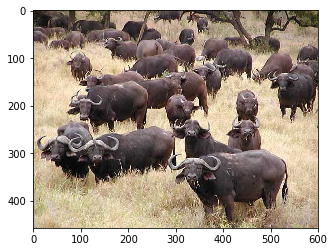

In [2]:
img1 = imread('bizon.jpg')
fig = plt.figure()
plt.imshow(img1)

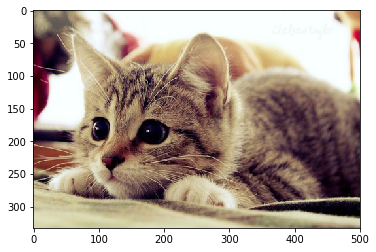

In [3]:
img2 = imread('kotyatochka.jpg')
fig = plt.figure()
plt.imshow(img2)

**1. (1 балл)** На каждом изображении, используя кластеризацию KMeans, выделите компоненты, охарактеризовав каждый пиксель следующим образом [$\lambda x_i,\lambda y_i,r_i,g_i,b_i$], где $x_i$ и $y_i$ — координаты пикселя, $r_i$,$g_i$,$b_i$ — его цвет, $\lambda$ — параметр, выражающий важность пространственной связности перед цветовой похожестью.
 
**2. (0.5 балл)** Визуализируйте результаты сегментации.

### KMeans clusterisation and visualization

In [4]:
# *************  Describtion of pixels  *************
def pixels_describtion(image,lambda_param):
    width = image.shape[0]
    height = image.shape[1]
    pixels = []
    for w in range(width):
        for h in range(height):
            pixel_parameters = []
            pixel_parameters.append(w*lambda_param)
            pixel_parameters.append(h*lambda_param)
            for c in range(3):
                pixel_parameters.append(img1[w][h][c])
            pixels.append(pixel_parameters)
    return pixels


# **************  KMeans visualisation  **************
def visualize_kmeans(image,model,n_regions,lmbd):
    labels = np.reshape(model.labels_, image.shape[0:2])
    plt.imshow(image)
    for l in range(n_regions):
        plt.contour(labels == l, contours=1, colors=[plt.cm.spectral(l / float(n_regions)), ])
    plt.title('lambda = '+ str(lmbd) + ', n_clusters = '+ str(n_regions) + ', algorithm = ' + str(model.algorithm))
    plt.xticks(())
    plt.yticks(())
    #plt.show()
    
    
# **************  KMeans preparation  **************   
def kmeans_segmentation(image,n_regions,lambda_parameter,algorithm):
    kmeans = KMeans(n_clusters=n_regions, algorithm=algorithm)
    described_image = pixels_describtion(image,lambda_parameter) # охарактеризовываем пиксели
    kmeans.fit(described_image)
    return kmeans


C:\Users\Gleb\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


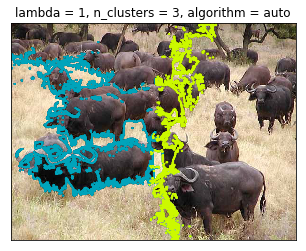

In [5]:
#первое изображение (бизон)
n_regions = 3
lambda_parameter = 1
kmeans  = kmeans_segmentation(img1,n_regions,lambda_parameter,'auto')
visualize_kmeans(img1,kmeans,n_regions,lambda_parameter) #визуализируем изображение

C:\Users\Gleb\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


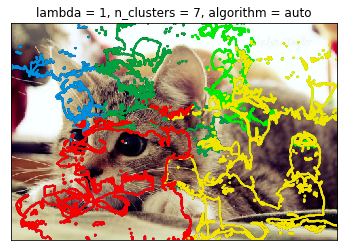

In [6]:
#второе изображение (кот)
n_regions = 7
lambda_parameter = 1
kmeans = kmeans_segmentation(img2,n_regions,lambda_parameter,'auto')
visualize_kmeans(img2,kmeans,n_regions,lambda_parameter) #визуализируем изображение

**3. (1 балл)** 
Выделите сегменты при помощи [спектральной кластеризации](http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering). Обратите внимание на [пример в sklearn](http://scikit-learn.org/0.16/auto_examples/cluster/plot_lena_segmentation.html). Для ускорения работы алгоритма рекомендуется привести изображение к серому цвету.
 
**4. (0.5 балл)** Визуализируйте результаты сегментации (аналогично рисунку выше).

### Spectral clusterisation and visualization

In [7]:
def visualize_spectral(img, labels , n_regions,beta):
    plt.imshow(img, cmap=plt.cm.gray)
    for l in range(n_regions):
        plt.contour(labels == l, contours=1, colors=[plt.cm.spectral(l / float(n_regions)), ])
    plt.title('n_clusters = ' + str(n_regions) + ', beta = ' + str(beta))
    plt.xticks(())
    plt.yticks(())
    #plt.show()


def spectral_segmentation(picture,n_regions,beta):
    eps = 1e-6
    img = sc.rgb2gray(picture) # приводим изображения к серому цвету
    graph = image.img_to_graph(img)
    graph.data = np.exp(-beta * graph.data / img.std()) + eps
    labels = spectral_clustering(graph,n_clusters=n_regions,random_state = 1,eigen_solver='amg')
    labels = np.reshape(labels,img.shape[0:2])
    return labels

C:\Users\Gleb\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


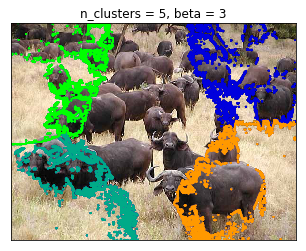

In [8]:
n_regions = 5
beta = 3
labels = spectral_segmentation(img1,n_regions,beta) 
visualize_spectral(img1,labels,n_regions,beta)

C:\Users\Gleb\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


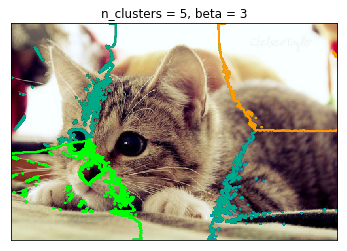

In [9]:
n_regions = 5
beta = 3
labels = spectral_segmentation(img2,n_regions,beta) 
visualize_spectral(img2,labels,n_regions,beta)

**5. (1 балл)** Поэкспериментируйте с параметрами алгоритмов и параметром $\lambda$ в признаках. Сравните два метода сегментации.

**6. (0.5 балл)**
Насколько хорошо выделяются объекты на изображениях?

### Эксперементы

Поэксперементируем с параметрами алгоритмов  и и параметром $\lambda$ и сравним два метода сигментации на примере первой картинки.
Для KMeans clusterisation будем менять параметры n_clusters и algorithm, а для Spectral clusterisation - n_clusters и beta

Рассмотрим влияние параметра $\lambda$ с фиксированным параметром algorithm = 'auto' (default)

C:\Users\Gleb\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


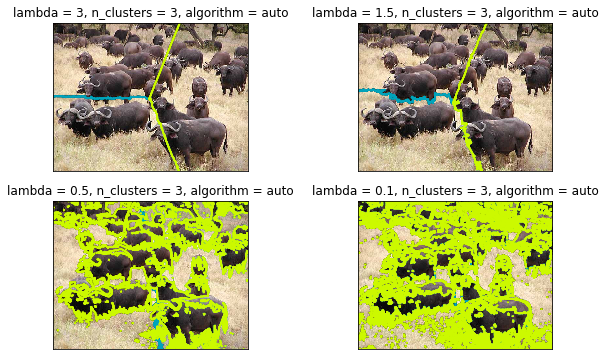

In [10]:
lambda_parameters = [3,1.5,0.5,0.1]
n_regions = 3
i = 0
plt.figure(figsize=(10,6))
for lambda_parameter in lambda_parameters:
    i+=1
    plt.subplot(2,2,i)
    kmeans  = kmeans_segmentation(img1,n_regions,lambda_parameter,'auto')
    visualize_kmeans(img1,kmeans,n_regions,lambda_parameter) #визуализируем изображение

Как мы можем наблюдать, с уменьшением параметра $\lambda$ каждый объект стремиться выдееляться точно по границам

Теперь проанализируем параметры max_iter и beta

C:\Users\Gleb\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


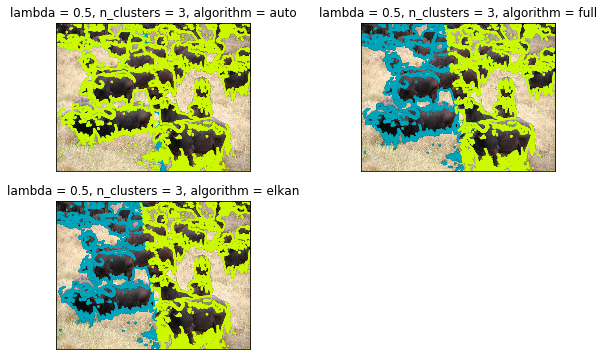

In [11]:
algorithms = ["auto","full","elkan"]
n_regions = 3
lambda_parameter = 0.5
i = 0
plt.figure(figsize=(10,6))
for algorithm in algorithms:
    i+=1
    plt.subplot(2,2,i)
    kmeans  = kmeans_segmentation(img1,n_regions,lambda_parameter,algorithm)
    visualize_kmeans(img1,kmeans,n_regions,lambda_parameter) #визуализируем изображение

C:\Users\Gleb\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


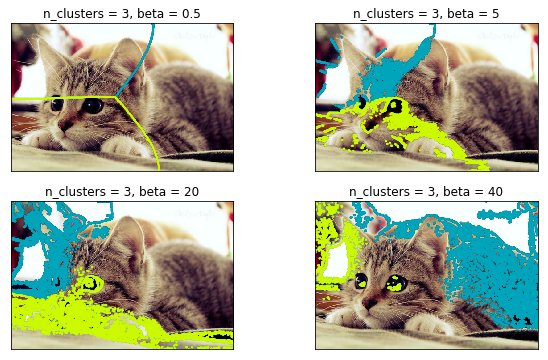

In [12]:
betas = [0.5,5,20,40]
n_regions = 3
i = 0
plt.figure(figsize=(10,6))
for beta in betas:
    i+=1
    plt.subplot(2,2,i)
    labels = spectral_segmentation(img2,n_regions,beta) 
    visualize_spectral(img2,labels,n_regions,beta)

### Алгоритм спектральной кластеризации
[статья](http://people.eecs.berkeley.edu/~malik/papers/SM-ncut.pdf)

* определить матрицу сходства $A$, используя Гауссово ядрор $K$ ($A_{i,j}\sim exp(-\alpha \Vert x_{i}-x_{j}\Vert^{2}) $) или просто матрице смежности (например $A_{i,j}=\delta_{i,j}$),
* построить лапласиан по $A$, например $L=D-A$ - простой, $L_{N}=D^{-1/2}LD^{-1/2}$ - нормализованный, где $D_{i,i}=\sum^{n}_{j}a_{i,j}$ - диагональная матрица,
* свойство лапласиана - $x^{T}Lx=\frac{1}{2}\sum_{i,j=1}^{n}w_{i,j}\Vert x_{i}-x_{j}\Vert^{2}$,
* найти собственные значения $L v=\lambda v$   (или решить обобщенную задачу $L v=\lambda D v$ )
* выбрать $k$ собтвенных векторов $\{ v_{i}, i=1, k \}$, соответствующих $k$ наименьшим (или наибольшим) собственным значениям  $\{ \lambda_{i}, i=1, k \}$ , и задать $k$-мерное подпространство $P^{T}LP$,
* найти кластеры в этом подпространстве.

**7. (2 доп. балла)** Визуализируйте первые несколько собственных векторов, соответствующие самым маленьким собственным числам.
Для этого вам надо более детально ознакомиться с тем, как  работает алгоритм (см. [статью](http://people.eecs.berkeley.edu/~malik/papers/SM-ncut.pdf)).

Вам может помочь [исходный код sklearn](https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/manifold/spectral_embedding_.py#L133) и функции из scipy: eigh, eigsh, lobpcg.


## Сжатие информации с помощью SVD

Выберите любую из картинок.
Приведите ее к серому цвету.

Чёрно-белая картинка - матрица, элементы которой - насыщенность серого цвета каждого из пикселей.

**Замечание.** Главные компоненты - это не скрытые признаки, а матрицы вида $u^{(i)}\sigma_i(v^{(i)})^T$, где $u^{(i)}, v^{(i)}$ --- столбцы матриц $U$ и $V$ соответственно. В частности, сумма первых нескольких главных компонент --- это наилучшее приближение исходной матрицы матрицей данного ранга.


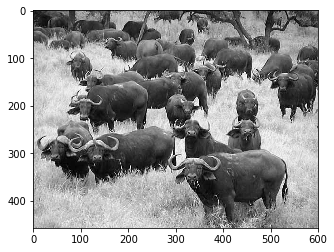

In [14]:
img = imread(r'bizon.jpg')
img = sc.rgb2gray(img)
plt.gray()
plt.imshow(img)


**8. (1 балл)** Постройте сингулярное разложение этой матрицы (не центрируя данные). 

**9. (1 балл)** Визуализуйте первую главную компоненту. Что получилось? Почему?

**10. (0.5 балл)** Визуализуйте компоненты с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Что получилось и почему?
Сколько первых компонент нужно взять для достаточно хорошего восстановления исходного изображения?

**11. (0.5 балл)** Как изменится результат, если сначала вы центрируете данные?



### Построим сингулярное разложение матрицы и визуализируем главные компоненты

In [15]:
U, sigma, V = np.linalg.svd(img)

In [16]:
def main_components(min_number,max_number,number_of_picture):
    sigma_matrix = np.zeros(img.shape)
    for i in range(min_number,max_number):
        sigma_matrix[i, i] = sigma[i]
    component = U.dot(sigma_matrix).dot(V)
    plt.gray()
    plt.subplot(2,3,number_of_picture)
    title = "components:" + str(min_number+1) + ' - ' + str(max_number)
    plt.title(title)
    plt.imshow(component)

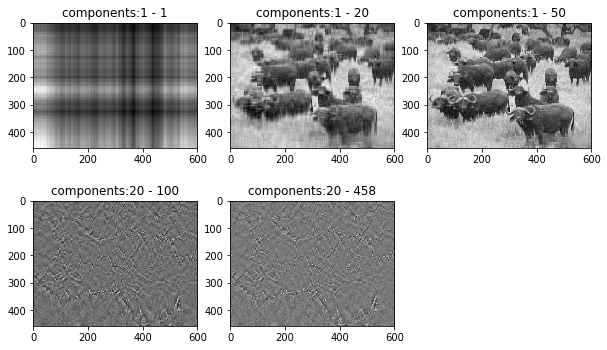

In [17]:
plt.figure(figsize=(10,6))
main_components(0,1,1)
main_components(0,20,2)
main_components(0,50,3)
main_components(19,100,4)
main_components(19,len(sigma),5)

##### Выводы
Сделаем выводы по получающимся результатам
При визуализации первой компоненты мы получаем большое количество информации об изображении, так как диагональные элементы
матрицы содержат информацию в порядке убывания от первого вверху  последнему элементу главной диагонали
Соответственно, если мы будем брать компоненты от первой и увеличивать их число, то изображение будет улучшаться, а если
среди компонент не будет первой, то теряется информация об изображении, а последнии компоненты и вовсе объясняют шум

#### После центрирования данных

In [18]:
img_mean = np.mean(img, axis = 1)
img_without_mean = img - img_mean.reshape(-1, 1)

In [19]:
U, sigma, V = np.linalg.svd(img_without_mean)

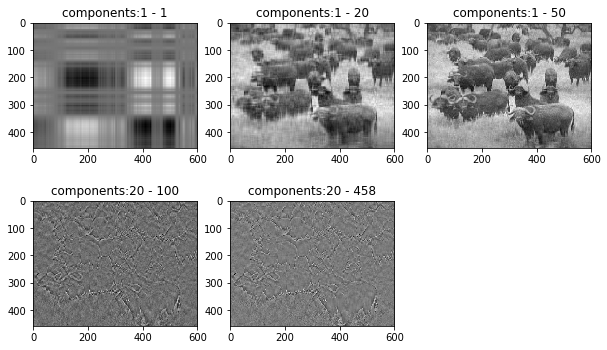

In [20]:
plt.figure(figsize=(10,6))
main_components(0,1,1)
main_components(0,20,2)
main_components(0,50,3)
main_components(19,100,4)
main_components(19,len(sigma),5)

После центрирования первые компоненты содержат больше информации об изображении, что наглядно демонстрирует визуализация
первой компоненты